<a href="https://colab.research.google.com/github/kibali-cell/ML-Projects/blob/main/ExpensesCategorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib


Data Collection & Preprocessing

In [508]:
# Transactions Data Loading
data = pd.read_csv('mpesa_transactions.csv')

In [509]:
print(X.dtypes)

Transaction Type      int64
Recipient             int64
Amount              float64
Is Expense          float64
dtype: object


In [510]:
# Filtering out 'Uncategorized' rows to ensure we train on labeled data
data = data[data['Category'] != 'Uncategorized']

In [511]:
data.head()

,Date,Time,Transaction Type,Recipient,Amount,Is Expense,Category
0,2025-04-26,14:38:11,Merchant Payment,6497271 - Jeremaih kobia,-120.00,True,Food
1,2025-04-26,14:30:32,Customer Payment to Small Business,2547******059 Samwel Kamau,-100.00,True,Food
2,2025-04-26,03:08:58,Customer Bundle Purchase,4093441SAFARICOM DATA BUNDLES,-10.00,True,Utilities
3,2025-04-25,19:56:57,Merchant Payment,5047120 - KENNEDY MAINA 2,-100.00,True,Transport
4,2025-04-25,19:49:20,Customer Payment to Small Business,2547******216 ANNE NJINO,-70.00,True,Food


In [512]:
data['Is Expense'] = data['Is Expense'].map({True: 1, False: 0})

In [513]:
# Convert 'Amount' to numeric (handle strings like "-120.00")
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Any NaN values in 'Amount' after conversion
if data['Amount'].isna().any():
    print("Warning: Some 'Amount' values could not be converted to numeric. Dropping these rows.")
    data = data.dropna(subset=['Amount'])

In [514]:
# Label Encoding (Features to numeric)
# Encode categorical variables
le_transaction_type = LabelEncoder()
data['Transaction Type'] = le_transaction_type.fit_transform(data['Transaction Type'])

le_recipient = LabelEncoder()
data['Recipient'] = le_recipient.fit_transform(data['Recipient'])

le_category = LabelEncoder()
data['Category'] = le_category.fit_transform(data['Category'])


In [515]:
# Verify data types to ensure all are numeric
X = data[['Transaction Type', 'Recipient', 'Amount', 'Is Expense']]
print("Data types of features:")
print(X.dtypes)

Data types of features:
Transaction Type      int64
Recipient             int64
Amount              float64
Is Expense          float64
dtype: object


In [516]:
data.head()

,Date,Time,Transaction Type,Recipient,Amount,Is Expense,Category
0,2025-04-26,14:38:11,6,157,-120.0,NaN,2
1,2025-04-26,14:30:32,2,25,-100.0,NaN,2
2,2025-04-26,03:08:58,1,75,-10.0,NaN,7
3,2025-04-25,19:56:57,6,76,-100.0,NaN,6
4,2025-04-25,19:49:20,2,34,-70.0,NaN,2


In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 384
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              377 non-null    object 
 1   Time              377 non-null    object 
 2   Transaction Type  377 non-null    int64  
 3   Recipient         377 non-null    int64  
 4   Amount            377 non-null    float64
 5   Is Expense        0 non-null      float64
 6   Category          377 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 31.7+ KB


In [518]:
# Checking for any data with null values
data.isnull().sum()

,0
Date,0
Time,0
Transaction Type,0
Recipient,0
Amount,0
Is Expense,377
Category,0


In [519]:
data.describe()

,Transaction Type,Recipient,Amount,Is Expense,Category
count,377.000000,377.000000,377.000000,0.0,377.000000
mean,4.604775,91.867374,-195.694960,NaN,1.904509
std,2.290192,60.104992,648.427886,NaN,2.174907
min,0.000000,0.000000,-4000.000000,NaN,0.000000
25%,2.000000,34.000000,-405.000000,NaN,0.000000
50%,6.000000,75.000000,-100.000000,NaN,2.000000
75%,6.000000,153.000000,-50.000000,NaN,2.000000
max,10.000000,201.000000,10499.000000,NaN,7.000000


In [520]:
print(X.dtypes)

Transaction Type      int64
Recipient             int64
Amount              float64
Is Expense          float64
dtype: object


Data Visualization


In [521]:
sns.set()

<Axes: xlabel='Category', ylabel='count'>

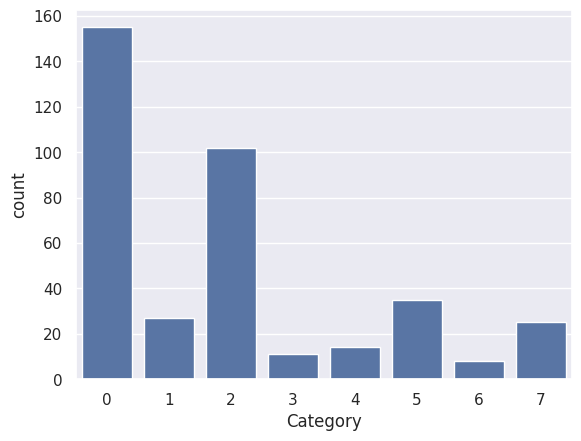

In [522]:
#making a count plot for categories column
sns.countplot(x='Category', data=data)

Separating Features and Target

In [523]:
X = data[['Transaction Type', 'Recipient', 'Amount', 'Is Expense']]
y = data['Category']


In [524]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(301, 4)
(76, 4)
(301,)
(76,)


Model Training

In [525]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Making Predictions

In [526]:
y_pred = model.predict(X_test)

In [527]:
# Model Evaluation

print("\nModel Perfomance Report:")
print(classification_report(y_test, y_pred, target_names=le_category.classes_))


Model Perfomance Report:
              precision    recall  f1-score   support

     Alcohol       1.00      0.97      0.98        29
       Bills       1.00      1.00      1.00         6
        Food       0.75      1.00      0.86        21
   Groceries       1.00      0.33      0.50         3
      Income       1.00      1.00      1.00         1
   Transfers       1.00      1.00      1.00         9
   Transport       0.00      0.00      0.00         4
   Utilities       1.00      1.00      1.00         3

    accuracy                           0.91        76
   macro avg       0.84      0.79      0.79        76
weighted avg       0.88      0.91      0.88        76



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [528]:
#Sample Prediction

sample_transaction = pd.DataFrame({
    'Transaction Type': [le_transaction_type.transform(['Merchant Payment'])[0]],
    'Recipient': [le_recipient.transform(['6345781 - THE THIRSTY HORSE'])[0]],
    'Amount': [-320.00],
    'Is Expense': [1]
})

predicted_category = le_category.inverse_transform(model.predict(sample_transaction))[0]
print(f"\nSample Prediction for '6345781 - THE THIRSTY HORSE': {predicted_category}")


Sample Prediction for '6345781 - THE THIRSTY HORSE': Alcohol
